# Lab 5

Daniel Alfredo Rayo Roldan

Gerardo Gabriel Pineda Riveiro

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv("./data/train.csv")

df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [10]:
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Número de filas: {df_train.shape[0]}")
print(f"Número de columnas: {df_train.shape[1]}")
print(f"\nColumnas: {list(df_train.columns)}")
print(f"\nTipos de datos:")
df_train.dtypes

=== INFORMACIÓN BÁSICA DEL DATASET ===
Número de filas: 7613
Número de columnas: 5

Columnas: ['id', 'keyword', 'location', 'text', 'target']

Tipos de datos:


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

## Análisis Exploratorio

### Valores faltantes

In [14]:
missing_values = df_train.isnull().sum()
missing_percent = (missing_values / len(df_train)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje': missing_percent.values
})
missing_df

,Columna,Valores Faltantes,Porcentaje
0,id,0,0.000000
1,keyword,61,0.801261
2,location,2533,33.272035
3,text,0,0.000000
4,target,0,0.000000


### Distribución de variable objetivo


=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===
Tweets NO desastre (0): 4342 (57.0%)
Tweets de desastre (1): 3271 (43.0%)


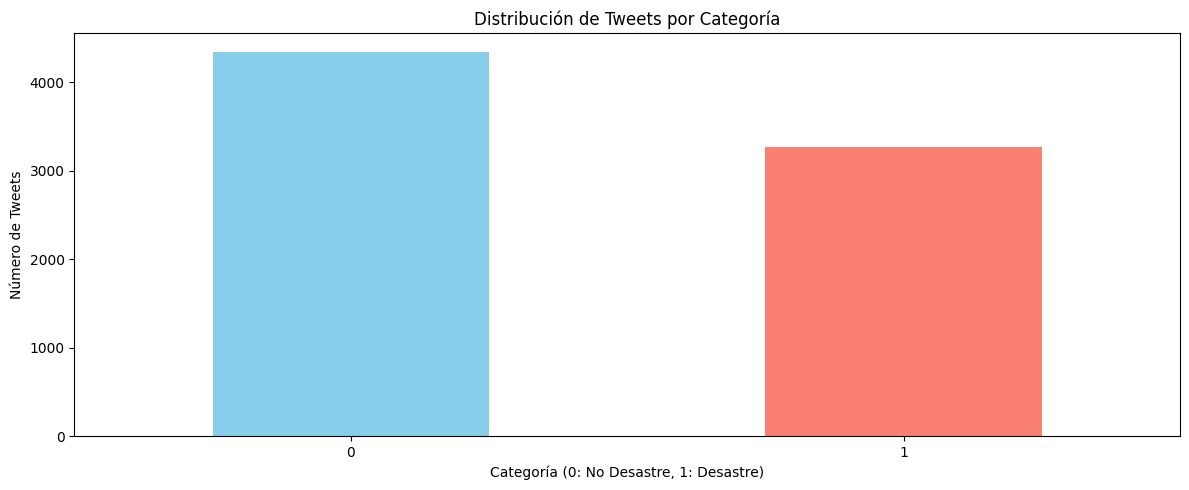

In [23]:
# Distribución de la variable objetivo
print("\n=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===")
target_counts = df_train['target'].value_counts()
print(f"Tweets NO desastre (0): {target_counts[0]} ({target_counts[0]/len(df_train)*100:.1f}%)")
print(f"Tweets de desastre (1): {target_counts[1]} ({target_counts[1]/len(df_train)*100:.1f}%)")

# Visualización de la distribución
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

# Gráfico de barras
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribución de Tweets por Categoría')
ax1.set_xlabel('Categoría (0: No Desastre, 1: Desastre)')
ax1.set_ylabel('Número de Tweets')
ax1.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [24]:
# Ejemplos de tweets por categoría
print("\n=== EJEMPLOS DE TWEETS ===")
print("Tweets de DESASTRE:")
for i, tweet in enumerate(df_train[df_train['target']==1]['text'].head(3)):
    print(f"{i+1}. {tweet}")

print("\nTweets NO de desastre:")
for i, tweet in enumerate(df_train[df_train['target']==0]['text'].head(3)):
    print(f"{i+1}. {tweet}")


=== EJEMPLOS DE TWEETS ===
Tweets de DESASTRE:
1. Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
2. Forest fire near La Ronge Sask. Canada
3. All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected

Tweets NO de desastre:
1. What's up man?
2. I love fruits
3. Summer is lovely
